# Xarray and Mandyoc output files working together

### Mandyoc output files

After running a subducion model with Mandyoc, a lot of ASCII files are obtained for each time step (not consider the steps files):

* Total number of files: 5430
* Size:

In [1]:
!du -h run/

2,8G	run/


<div style="text-align: center;">

<h3>Model: </h3>   

<img src="temp.jpg" style="width: 60%" align="middle">
        
</div>

Using ``xarray`` I can transform all of them in a ``xr.Dataset``.

This dataset has a size of:

In [2]:
!du -h output_data.nc

2,2G	output_data.nc


__Saving space is not big but there are other advantages...__

* More easy to load and save

* It isn't necessary to remember how the information of each node is arranged in the Mandyoc output files.

* It is easier to manage all the information to process and plot.


To do that I create a repository called [__modelling_earth__](https://github.com/aguspesce/modelling_earth/)

### Trasform the Mandyoc output in a xr.Dataset

In [1]:
# Import the reopository
import modelling_earth as me

# Import xarray
import xarray as xr


In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

Create a dataset with ``modelling_earth``

In [5]:
start = time.time()

# Create the dataset. It function can be use with 2 or 3 dimentions. 
#dataset = me.read_mandyoc_data("run", parameters_file="param_1.5.3_2D.txt")

# Save dataset as netcdf
dataset.to_netcdf("output_data.nc")

In [6]:
end = time.time()
print("Time taken:", (end-start)/60, " minutes")
#Time taken: 23.47510194381078  minutes

Time taken: 22.54492191473643  minutes


__It is nesesary to improve this time__. I know it !!! :)

But load a ``xr.Dataset`` in memory is very fast

In [3]:
start = time.time()

dataset = xr.open_dataset("output_data.nc")

end = time.time()
print("Time taken:", (end-start), " seconds")

Time taken: 0.9600212574005127  seconds


Xarray computes data ‘lazily’. 
That means that data is only loaded into memory when it isactually required. 

__I never use, but:__

``xarray`` integrates with ``dask`` to support datasets that don’t fit into memory.
``Dask`` divides arrays into many small pieces, called chunks, each of which is presumed to be small enough to fit into memory. 
See [Xarray + Dask](https://xarray.pydata.org/en/stable/dask.html#dask)

In [4]:
dataset

<xarray.Dataset>
Dimensions:           (time: 451, x: 401, x_center: 400, z: 176, z_center: 175)
Coordinates:
  * time              (time) float64 0.0 0.0133 0.03186 ... 49.62 49.73 49.87
    step              (time) int32 ...
  * x                 (x) float64 0.0 1e+04 2e+04 ... 3.98e+06 3.99e+06 4e+06
  * x_center          (x_center) float64 5e+03 1.5e+04 ... 3.985e+06 3.995e+06
  * z                 (z) float64 -6.6e+05 -6.56e+05 -6.52e+05 ... 3.6e+04 4e+04
  * z_center          (z_center) float64 -6.58e+05 -6.54e+05 ... 3.4e+04 3.8e+04
Data variables:
    temperature       (time, x, z) float64 ...
    density           (time, x, z) float64 ...
    radiogenic_heat   (time, x, z) float64 ...
    viscosity_factor  (time, x, z) float64 ...
    strain            (time, x, z) float64 ...
    pressure          (time, x, z) float64 ...
    velocity_x        (time, x, z) float64 ...
    velocity_z        (time, x, z) float64 ...
    viscosity         (time, x_center, z_center) float64 ...
Attributes:
    shape:                   [401 176]
    mg:                      1
    stepMAX:                 7000
    timeMAX:                 50000000.0
    dt_MAX:                  10.0e6
    print_step:              10
    visc:                    1.0E19
    visc_MAX:                1.0E24
    visc_MIN:                1.0E19
    n_interfaces:            9
    geoq_on:                 1
    geoq_fac:                100.0
    veloc:                   0.0E-2
    deltaT:                  1500.
    alpha_exp_thermo:        3.28E-5
    kappa:                   1.0E-6
    gravity:                 10.0
    rhom:                    3300.
    H_per_mass:              0.0E-12
    c_heat_capacity:         1250.
    non_linear:              1
    adiabatic_H:             1
    radiogenic_H:            1
    bcv_top_normal:          1
    bcv_top_slip:            0
    bcv_bot_normal:          1
    bcv_bot_slip:            1
    bcv_left_normal:         1
    bcv_left_slip:           1
    bcv_right_normal:        1
    bcv_right_slip:          1
    bcT_top:                 1
    bcT_bot:                 1
    bcT_left:                0
    bcT_right:               0
    rheol:                   6
    T_initial:               3
    H_lito:                  180000.0
    h_air:                   40000.0
    beta_max:                3.0
    ramp_begin:              2000.0E3
    ramp_end:                2200.0E3
    dimension:               2
    region:                  [      0. 4000000. -660000.   40000.]
    coords_units:            m
    times_units:             Ma
    temperature_units:       C
    density_units:           kg/m^3
    heat_units:              W/m^3
    viscosity_factor_units:  dimensionless
    viscosity_units:         Pa s
    strain_rate_units:       s^(-1)
    pressure_units:

Because ``xarray`` is based on ``numpy.array``, you can almost use its methods. 

For example:

In [5]:
dataset.max()

<xarray.Dataset>
Dimensions:           ()
Data variables:
    temperature       float64 1.501e+03
    density           float64 3.4e+03
    radiogenic_heat   float64 1e-12
    viscosity_factor  float64 1e+24
    strain            float64 134.5
    pressure          float64 2.187e+10
    velocity_x        float64 3.468e-08
    velocity_z        float64 2.364e-08
    viscosity         float64 1e+24

## Some funtionalities of Xarray

### Selecting data with named dimensions

In Xarray there are many different ways for selecting and indexing data.

``isel()``: Selection based on the index of a coordinate.

``sel()``: Selection based on the value of a coordinate.



For example: 

I want the model results for a time equial to 25 Ma, so I use the function``sel()``

In [4]:
dataset_25Ma = dataset.sel(time=25)
dataset_25Ma

KeyError: 25.0

The error is because the Dataset doesn't have a time equal to 25, so I look for the value closest to it using a method 'nearest':

In [9]:
dataset_25Ma = dataset.sel(time=25,
                           method='nearest',
                           tolerance=1
                           )
dataset_25Ma
# It is a xr.Dataset has the model data for the time closer to 25 Ma, it is 24.94 Ma.

<xarray.Dataset>
Dimensions:           (x: 401, x_center: 400, z: 176, z_center: 175)
Coordinates:
    time              float64 24.94
    step              int32 ...
  * x                 (x) float64 0.0 1e+04 2e+04 ... 3.98e+06 3.99e+06 4e+06
  * x_center          (x_center) float64 5e+03 1.5e+04 ... 3.985e+06 3.995e+06
  * z                 (z) float64 -6.6e+05 -6.56e+05 -6.52e+05 ... 3.6e+04 4e+04
  * z_center          (z_center) float64 -6.58e+05 -6.54e+05 ... 3.4e+04 3.8e+04
Data variables:
    temperature       (x, z) float64 ...
    density           (x, z) float64 ...
    radiogenic_heat   (x, z) float64 ...
    viscosity_factor  (x, z) float64 ...
    strain            (x, z) float64 ...
    pressure          (x, z) float64 ...
    velocity_x        (x, z) float64 ...
    velocity_z        (x, z) float64 ...
    viscosity         (x_center, z_center) float64 ...
Attributes:
    shape:                   [401 176]
    mg:                      1
    stepMAX:                 7000
    timeMAX:                 50000000.0
    dt_MAX:                  10.0e6
    print_step:              10
    visc:                    1.0E19
    visc_MAX:                1.0E24
    visc_MIN:                1.0E19
    n_interfaces:            9
    geoq_on:                 1
    geoq_fac:                100.0
    veloc:                   0.0E-2
    deltaT:                  1500.
    alpha_exp_thermo:        3.28E-5
    kappa:                   1.0E-6
    gravity:                 10.0
    rhom:                    3300.
    H_per_mass:              0.0E-12
    c_heat_capacity:         1250.
    non_linear:              1
    adiabatic_H:             1
    radiogenic_H:            1
    bcv_top_normal:          1
    bcv_top_slip:            0
    bcv_bot_normal:          1
    bcv_bot_slip:            1
    bcv_left_normal:         1
    bcv_left_slip:           1
    bcv_right_normal:        1
    bcv_right_slip:          1
    bcT_top:                 1
    bcT_bot:                 1
    bcT_left:                0
    bcT_right:               0
    rheol:                   6
    T_initial:               3
    H_lito:                  180000.0
    h_air:                   40000.0
    beta_max:                3.0
    ramp_begin:              2000.0E3
    ramp_end:                2200.0E3
    dimension:               2
    region:                  (0, 4000000.0, -660000.0, 40000.0)
    coords_units:            m
    times_units:             Ma
    temperature_units:       C
    density_units:           kg/m^3
    heat_units:              W/m^3
    viscosity_factor_units:  dimensionless
    viscosity_units:         Pa s
    strain_rate_units:       s^(-1)
    pressure_units:

To select a range of values, you’ll need to use a slice.
The syntax is similar:

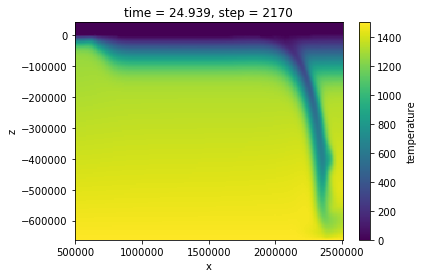

In [14]:
dataset_25Ma.temperature.sel(x=slice(500e3, 2500e3)).plot(x="x", y="z")

__Plot the viscosity with defined temperature contours for time = 25 Ma__

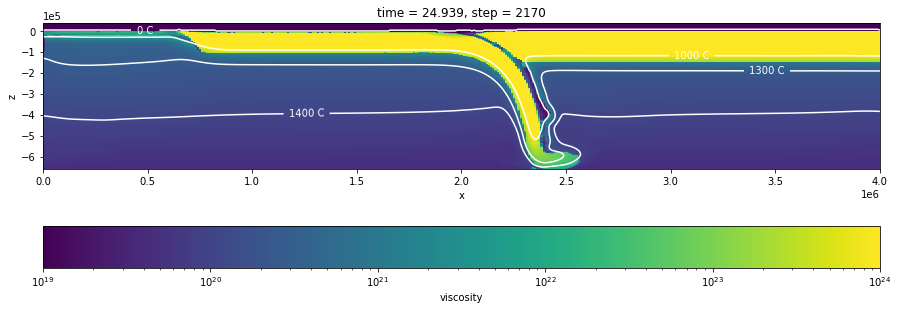

In [9]:
fig, ax = plt.subplots(figsize=(15, 7))
# Change the oriantation of the colorbar
cbar_kwargs = {"orientation": "horizontal"}
kwargs = {"cbar_kwargs": cbar_kwargs}

# Plot theviscosity for time=25Ma 
dataset_25Ma.viscosity.plot.pcolormesh(ax=ax, 
                                       x="x_center", 
                                       y="z_center",
                                       norm=LogNorm(),
                                       **kwargs
                                      )

# Plot the coutour for defined temperatures
kw = {'levels':[0, 1000, 1300, 1400], 'colors':['w']}
cs = dataset_25Ma.temperature.plot.contour(ax=ax,
                                           x="x",
                                           y="z",
                                           **kw
                                          )
ax.clabel(cs, inline=1, fontsize=10, fmt="%.0f C")

ax.ticklabel_format(axis="both", style="sci", scilimits=(0, 0))
ax.set_aspect("equal")
plt.show()

### Masking with ``where()``

It is useful to select an object, according to a condition, with the same shape as the original data, but with some elements masked.


For example:

I wnat to select the density values where the temperature is over 1300 C for all time steps.


In [5]:
condition = dataset.temperature.values < 1300

# It is applyed to density DataArray for all time steps
temp_condition = dataset.density.where(condition)
# The false value are nans

temp_condition # It is a DataArray

<xarray.DataArray 'density' (time: 451, x: 401, z: 176)>
array([[[nan, nan, nan, ...,  1.,  1.,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.],
        ...,
        [nan, nan, nan, ...,  1.,  1.,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.]],

       [[nan, nan, nan, ...,  1.,  1.,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.],
        ...,
        [nan, nan, nan, ...,  1.,  1.,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.]],

       [[nan, nan, nan, ...,  1.,  1.,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.],
        ...,
        [nan, nan, nan, ...,  1.,  1.,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.]],

       ...,

       [[nan, nan, nan, ...,  1.,  1.,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.],
        ...,
        [nan, nan, nan, ...,  1.,  1.,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.]],

       [[nan, nan, nan, ...,  1.,  1.,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.],
        ...,
        [nan, nan, nan, ...,  1.,  1.,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.]],

       [[nan, nan, nan, ...,  1.,  1.,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.],
        ...,
        [nan, nan, nan, ...,  1.,  1.,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.]]])
Coordinates:
  * time     (time) float64 0.0 0.0133 0.03186 0.05256 ... 49.62 49.73 49.87
    step     (time) int32 ...
  * x        (x) float64 0.0 1e+04 2e+04 3e+04 ... 3.98e+06 3.99e+06 4e+06
  * z        (z) float64 -7e+05 -6.96e+05 -6.92e+05 ... -8e+03 -4e+03 0.0

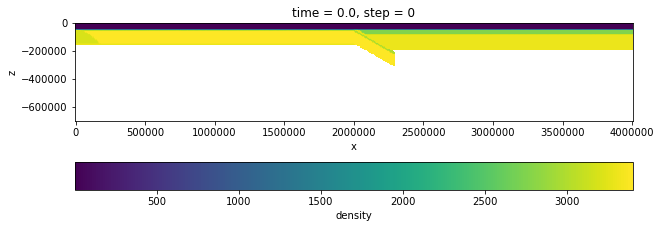

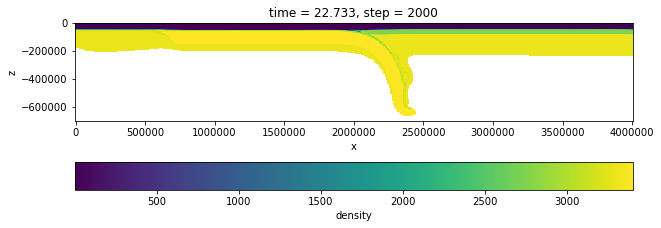

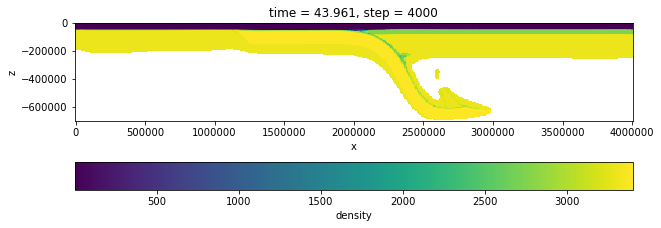

In [8]:
# Change the oriantation of the colorbar
cbar_kwargs = {"orientation": "horizontal"}
kwargs = {"cbar_kwargs": cbar_kwargs}

for time in dataset.time.values[::200]:
    fig, ax = plt.subplots(figsize=(10, 5))
    temp_condition.sel(time=time).plot(ax=ax, x="x", y="z", **kwargs)
    
    ax.set_aspect("equal")
    plt.show()

### Plot in a loop with ``modelling_earth`` repository

Show an example to plot the temperature and the velocity for several times using a loop and ``modelling_earth`` repository.

``me.plot_velocity_2d`` is based on matplotlib.pyplot.quiver and automatically reads the velocity from the Dataset to plot as vector. 

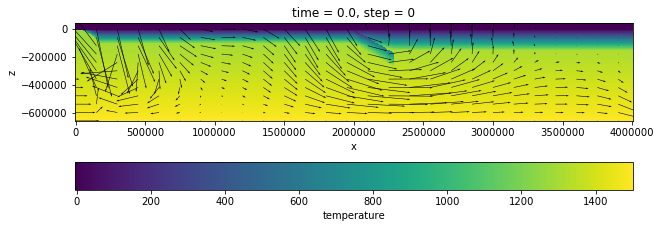

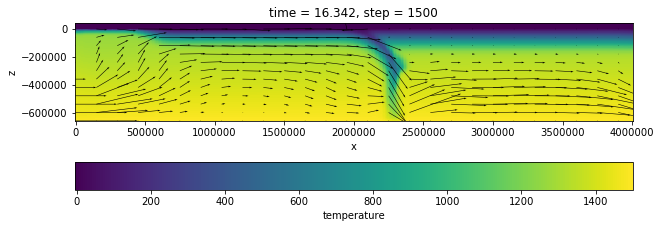

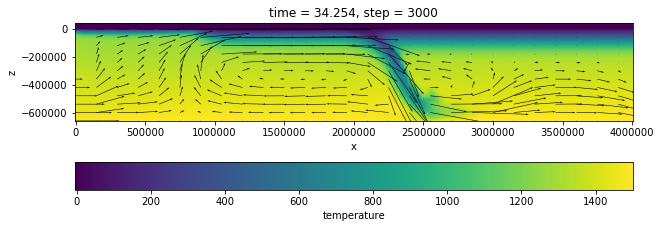

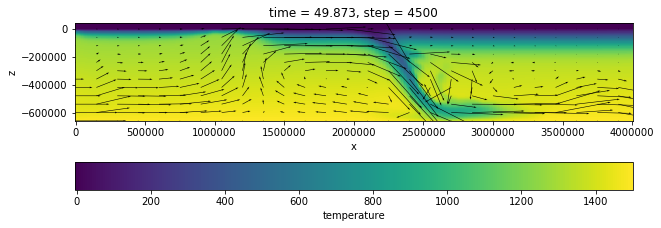

In [10]:
# Change the oriantation of the colorbar
cbar_kwargs = {"orientation": "horizontal"}
kwargs = {"cbar_kwargs": cbar_kwargs}

# Get the maximun and munimun temperature values for the entire time
vmin = dataset.temperature.values.min()
vmax = dataset.temperature.values.max()

# Loop to plot the first five steps
for time in dataset.time.values[::150]:
    fig, ax = plt.subplots(figsize=(10, 5))
    
    # Plot temperature
    dataset.temperature.sel(time=time).plot.pcolormesh(ax=ax, x="x", y="z",
                                                       vmin=vmin, vmax=vmax, 
                                                       **kwargs
                                                      )
   
    # Plot velocity
    # me.plot_velocity_2d is based on matplotlib.pyplot.quiver
    me.plot_velocity_2d(dataset.sel(time=time),
                        ax=ax, 
                        slice_grid=15,
                        width=0.001
                       )
    
    ax.ticklabel_format(axis="both", style="sci", 
                        scilimits=(dataset.x.min(), dataset.z.max())
                       )
    ax.set_aspect("equal")
    plt.show()        

### These are some of the funtionalities of Xarray... 

In its webside, you can faund much more about: 
* Interpolating data
* Indexing and selectin data
* Reshaping, reorganizing and combining data
* Plots options ...

I won’t cover those here, because I want to keep this seminary simple.

__I encourage you to take a look at xarray docs and try to play with it.__ 

### I hope you found this seminary useful!